In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('censusincome.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
df = data.copy()

In [7]:
df.drop(['fnlwgt','capital.gain','capital.loss'],axis=1,inplace=True)

In [8]:
df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


In [9]:
df.tail()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32560,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   hours.per.week  32561 non-null  int64 
 10  native.country  32561 non-null  object
 11  income          32561 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [12]:
df.describe(include='all')

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,24720
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,NaN
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [13]:
#total rows and columns in dataset
df.shape

(32561, 12)

In [14]:
#cleaning string in object columns
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = df[i].str.strip()

In [17]:
#encoding salary column
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

In [18]:
#people whose earning less than 50K
df[df['income']==0].shape

(24720, 12)

In [19]:
#people whose earning more than 50K
df[df['income']==1].shape

(7841, 12)

In [20]:
#cleaning rows
l=[]
for i in df.columns:
    for j in range(df.shape[0]):
        if df[i][j]=='?':
            l.append(j)
df.drop(index=l,inplace=True)
print(len(l))

4262


In [21]:
#no null value in dataset
df.isnull().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [23]:
#doing private job and salary more than 50K
new_df=df[df['workclass']=='Private']
print(len(new_df[new_df['income']==1]))
new_df[new_df['income']==1].head(2)

4876


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,35,United-States,1
12,52,Private,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,20,United-States,1


<AxesSubplot:xlabel='income'>

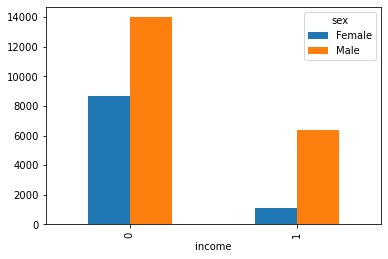

In [25]:
#cheacking male and female ration according to their salary
class_sex = pd.crosstab(df['income'],df['sex'])
class_sex.plot(kind='bar')

In [26]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [28]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==1]))
avg_age[avg_age['income']==1].head(2)

5042


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
7,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,20,United-States,1
10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,35,United-States,1


so there is '5042' people whose age is greater than average age earning more than 50K

In [29]:
#how many of people whose age above avarge earn more than 50K
avg_age = df[df['age']>38]
print(len(avg_age[avg_age['income']==0]))
avg_age[avg_age['income']==0].head(2)

8911


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0


<AxesSubplot:xlabel='income'>

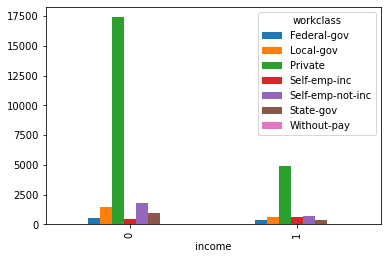

In [30]:
#cheacking distribution of people in workclass according to salary
class_salary = pd.crosstab(df['income'],df['workclass'])
class_salary.plot(kind='bar')

<AxesSubplot:xlabel='education'>

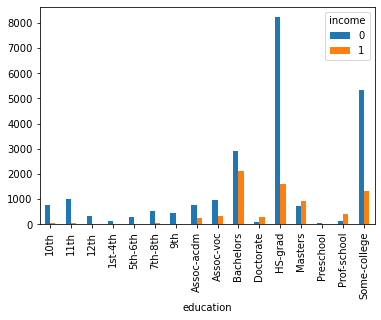

In [32]:
#cheacking distribution of people according to salary
salary_education = pd.crosstab(df['education'],df['income'])
salary_education.plot(kind='bar')

In [33]:
#numeric columns
num_col=[]
for i in df.columns:
    if df[i].dtype=='int64':
        num_col.append(i)

        
num_col = num_col[0:2]
num_col 

['age', 'education.num']

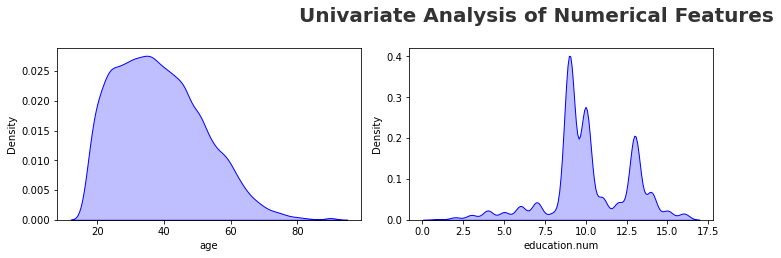

In [34]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [35]:
#categorical columns
cat_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col    

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

<Figure size 432x288 with 0 Axes>

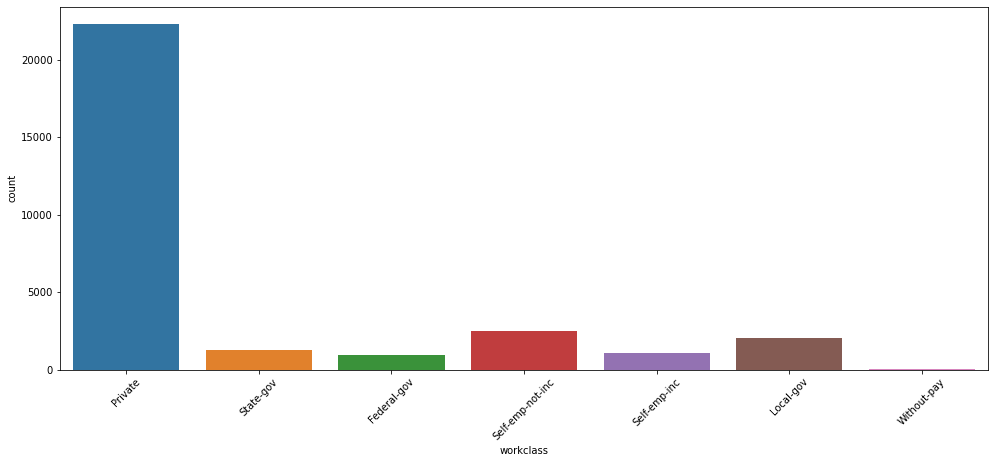

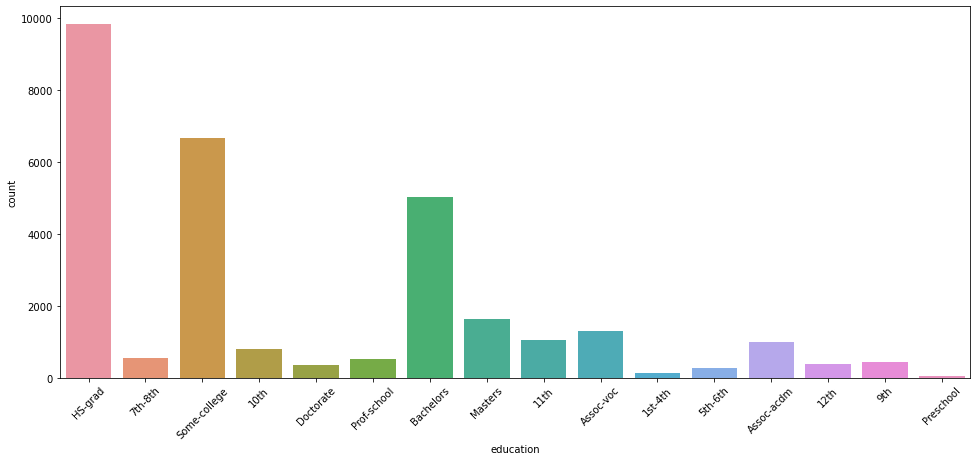

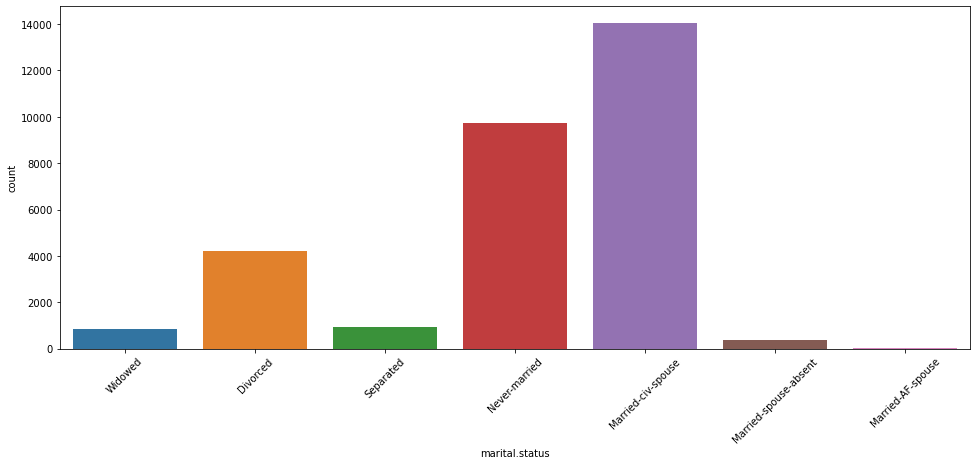

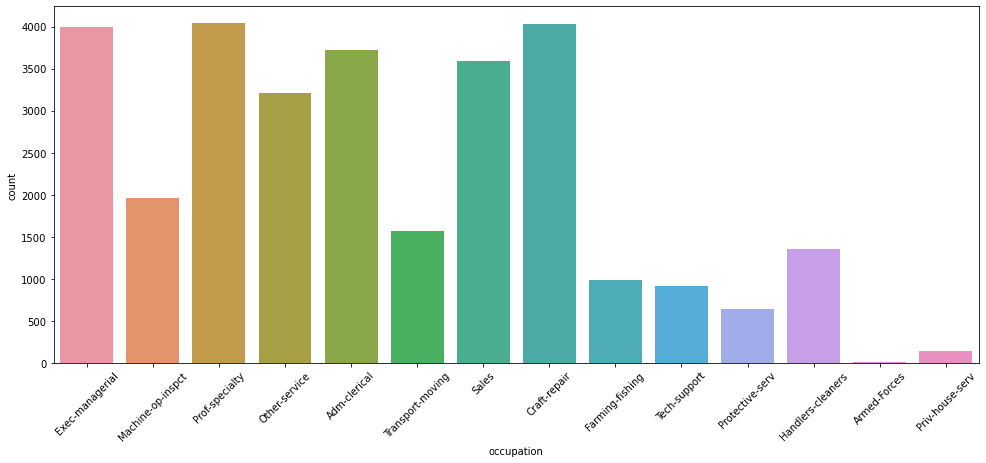

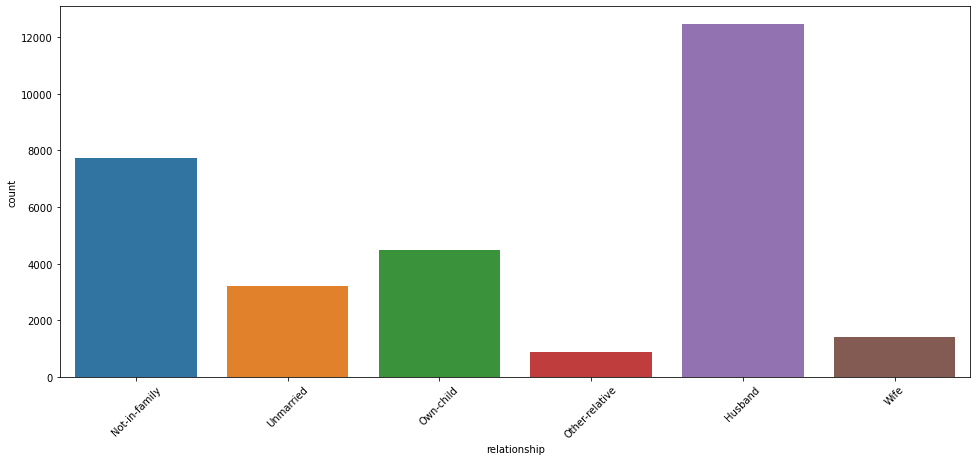

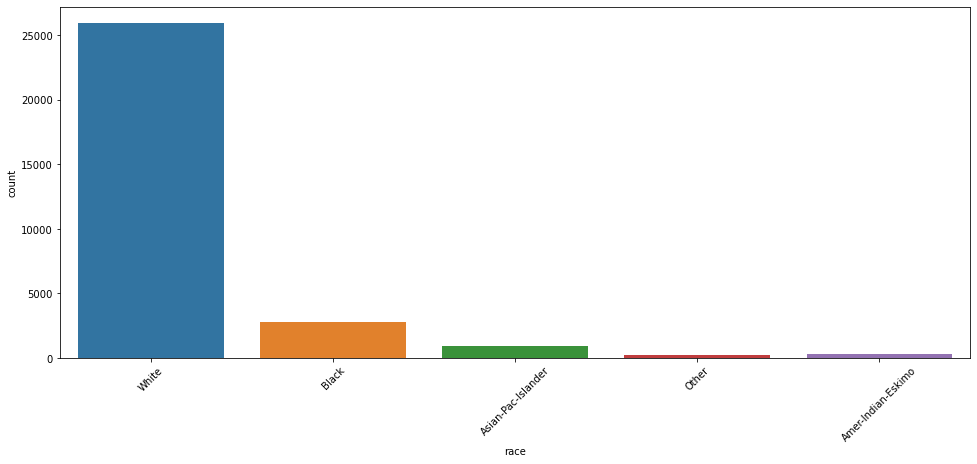

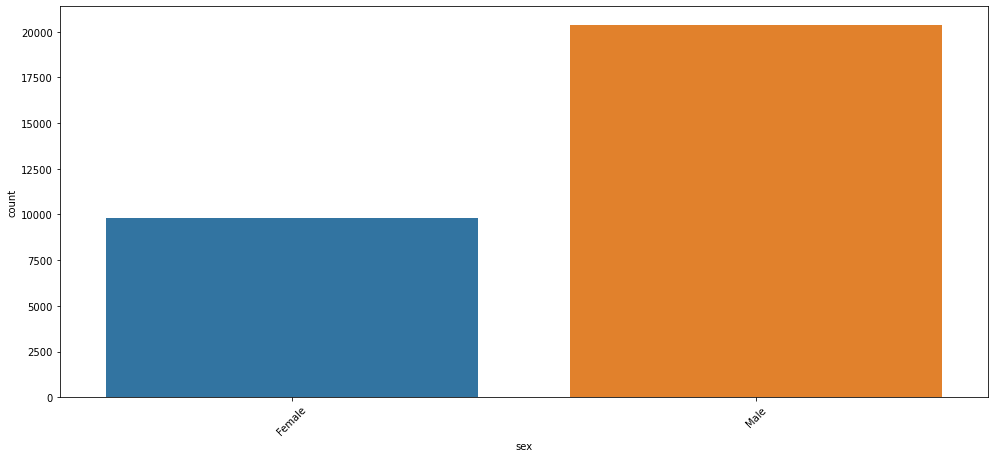

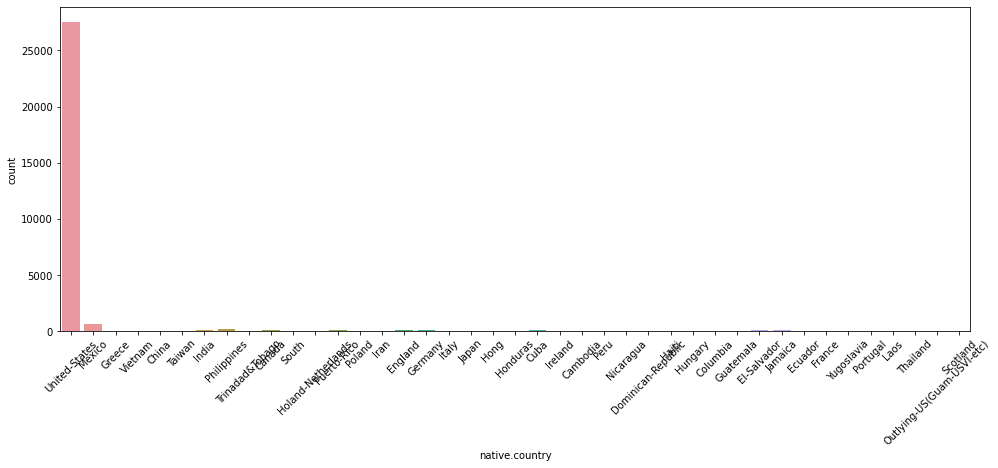

In [36]:
# categorical columns
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_col)):
    plt.figure(figsize=(40, 50))
    plt.subplot(8, 3, i+1)
    sns.countplot(x=df[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [37]:
#Check Multicollinearity in Numerical features¶
df[(list(df.columns)[1:])].corr()

,education.num,hours.per.week,income
education.num,1.000000,0.152522,0.335286
hours.per.week,0.152522,1.000000,0.229480
income,0.335286,0.229480,1.000000


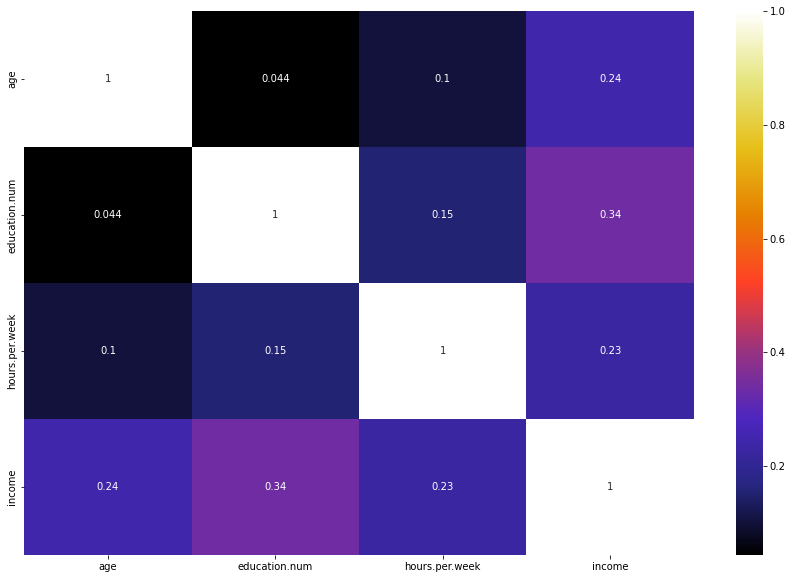

In [38]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [40]:
#Check Multicollinearity for Categorical features
from scipy.stats import chi2_contingency
chi2_test = []
for feature in df[cat_col]:
    if chi2_contingency(pd.crosstab(df['income'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_col, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,workclass,Reject Null Hypothesis
1,education,Reject Null Hypothesis
2,marital.status,Reject Null Hypothesis
3,occupation,Reject Null Hypothesis
4,relationship,Reject Null Hypothesis
5,race,Reject Null Hypothesis
6,sex,Reject Null Hypothesis
7,native.country,Reject Null Hypothesis


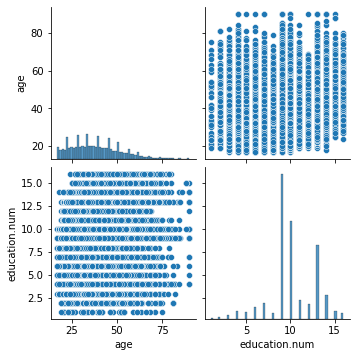

In [41]:
sns.pairplot(df[num_col])

In [44]:
#Treating outliers
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].mean()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].mean()

In [46]:
new_df = df.copy()
new_df.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
1,38.437902,Private,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0
3,54.000000,Private,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0
4,41.000000,Private,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0
5,34.000000,Private,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,45,United-States,0
6,38.000000,Private,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0


In [48]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
#data.drop('income',axis=1,inplace=True)

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()


data_encoded = encoder.fit_transform(data_categorical)

a = pd.DataFrame(data_encoded,columns=['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country','salary'])
b = data[['age','hours.per.week']]
#c=data['hours-per-week']
new_df = pd.concat([b,a],axis=1)

In [49]:
new_df

,age,hours.per.week,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,90,40,0.0,11.0,6.0,0.0,1.0,4.0,0.0,39.0,0.0
1,82,18,4.0,11.0,6.0,4.0,1.0,4.0,0.0,39.0,0.0
2,66,40,0.0,15.0,6.0,0.0,4.0,2.0,0.0,39.0,0.0
3,54,40,4.0,5.0,0.0,7.0,4.0,4.0,0.0,39.0,0.0
4,41,40,4.0,15.0,5.0,10.0,3.0,4.0,0.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
32556,22,40,4.0,15.0,4.0,11.0,1.0,4.0,1.0,39.0,0.0
32557,27,38,4.0,7.0,2.0,13.0,5.0,4.0,0.0,39.0,0.0
32558,40,40,4.0,11.0,2.0,7.0,0.0,4.0,1.0,39.0,1.0
32559,58,40,4.0,11.0,6.0,1.0,4.0,4.0,0.0,39.0,0.0


In [50]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()


#for i in cat_col:
    #new_df[i]= label_encoder.fit_transform(new_df[i])

Now we are good to go for model building

In [51]:
new_df.shape

(32561, 11)

In [52]:
# Dependent and independent features
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

In [54]:
#Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.30)

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22792, 10)
(22792,)
(9769, 10)
(9769,)


In [56]:
#scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [58]:
model.score(X_train,y_train)

0.7614075114075114

In [59]:
log_pred = model.predict(X_test)

In [60]:
accuracy_score(y_test,log_pred)

0.7656873784420104

In [61]:
params = dict(penalty=['l1','l2','elasticnet'],C=[1,0.1,0.01,10,100])

In [62]:
best_log_model = RandomizedSearchCV(model,params,random_state=7)
best_log_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 0.1, 0.01, 10, 100],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=7)

In [63]:
best_log_model.best_params_

{'penalty': 'l2', 'C': 10}

In [64]:
best_model = LogisticRegression(penalty='l2',C = 10)

In [65]:
best_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [66]:
best_pred = best_model.predict(X_test)

In [67]:
accuracy_score(y_test,best_pred)

0.7656873784420104

In [68]:
#RandomForest Classifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
model.score(X_train,y_train)

0.9719199719199719

In [70]:
model_pred = model.predict(X_test)

In [71]:
accuracy_score(y_test,model_pred)

0.8233186610707339

In [72]:
params = dict(criterion=['gini', 'entropy'],max_depth=[1,10,5],min_samples_split=[1,10])

In [73]:
best_ran_model = RandomizedSearchCV(model,params,random_state=7)
best_ran_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 5],
                                        'min_samples_split': [1, 10]},
                   random_state=7)

In [74]:
best_ran_model.best_params_

{'min_samples_split': 10, 'max_depth': 10, 'criterion': 'gini'}

In [75]:
best_model = RandomForestClassifier(min_samples_split= 5, max_depth= 10, criterion= 'entropy').fit(X_train,y_train)

In [76]:
best_model.score(X_train,y_train)

0.8467883467883468

In [77]:
best_pred = best_model.predict(X_test)

In [78]:
accuracy_score(y_test,best_pred)

0.8357047804278841

In [81]:
#Naive Bayes
model  = GaussianNB().fit(X_train,y_train)
print('model score',model.score(X_train,y_train))

model_pred = model.predict(X_test)
print('accuracy score',accuracy_score(y_test,model_pred))

model score 0.7609248859248859
accuracy score 0.7525847067253557


In [82]:
#SVC
svc = SVC().fit(X_train,y_train)
svc.score(X_train,y_train)

0.8117760617760618

In [83]:
svc_pred = svc.predict(X_test)
accuracy_score(y_test,svc_pred)

0.8087828846350701